In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [70]:
df = pd.read_csv('erste_komplett_clean.csv')
df_2 = pd.read_csv('zweite_komplett_clean.csv')

In [71]:
df = pd.concat([df, df_2])

In [142]:
df.head()

,index,competition,saison,gameday,date,home_team_name,guest_team_name,result,home_coach,home_game_system,...,guest_coach,guest_game_system,guest_team_id,time,viewers,weekday,day,month,year,identifier
0,0,2. Liga,2009/10,1,2009-07-14 19:00:00,FC Gratkorn,First Vienna FC,1:1,Michael Fuchs †,4-4-2,...,Peter Stöger,3-4-2-1,2364,19:00,1000,1,14,7,2009,4c0f0ae86edebb6bcc1ad9c5d833e0055eea9911b86e5a...
1,36,2. Liga,2009/10,1,2009-07-14 19:00:00,FC Wacker Innsbruck,Red Bull Juniors Salzburg,2:1,Walter Kogler,4-4-2,...,Niko Kovac,3-5-2,6227,19:00,4500,1,14,7,2009,770ca276a4e39c8c7d48039d26db191013bb1edb89e11f...
2,69,2. Liga,2009/10,1,2009-07-14 19:00:00,SC Rheindorf Altach,TSV Hartberg,4:0,Adi Hütter,4-4-2,...,Bruno Friesenbichler,4-5-1,4467,19:00,5500,1,14,7,2009,0c1d6b332d513d5100a3b95c918abfb51a3ced2a5f0af3...
3,97,2. Liga,2009/10,1,2009-07-14 19:00:00,SKN St. Pölten,FC Dornbirn,2:0,Martin Scherb,4-4-2,...,Armand Benneker,4-5-1,7448,19:00,1200,1,14,7,2009,fdad59fd80b2ca7eeba8afad9412a5ec712c9755657cd9...
4,183,2. Liga,2009/10,1,2009-07-14 19:00:00,SC Austria Lustenau,FK Austria Wien Amateure,1:0,Edmund Stöhr,4-4-2,...,Johann Dihanich,4-4-2 Raute,4383,19:00,1300,1,14,7,2009,1ebc796f6e71b70d1d8e317571525b497375957282b533...


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 21 columns):
index                5152 non-null int64
competition          5152 non-null object
saison               5152 non-null object
gameday              5152 non-null object
date                 5152 non-null datetime64[ns]
home_team_name       5152 non-null object
guest_team_name      5152 non-null object
result               5152 non-null object
home_coach           5152 non-null object
home_game_system     5152 non-null object
home_team_id         5152 non-null int64
guest_coach          5152 non-null object
guest_game_system    5152 non-null object
guest_team_id        5152 non-null int64
time                 5152 non-null object
viewers              5152 non-null int64
weekday              5152 non-null object
day                  5152 non-null object
month                5152 non-null object
year                 5152 non-null object
identifier           5152 non-null object
dtypes:

In [144]:
df.home_team_id.head()

0    5192
1    2444
2    3551
3    2662
4     541
Name: home_team_id, dtype: int64

In [145]:
df[df.viewers == 11422]

,index,competition,saison,gameday,date,home_team_name,guest_team_name,result,home_coach,home_game_system,...,guest_coach,guest_game_system,guest_team_id,time,viewers,weekday,day,month,year,identifier
44,120,Bundesliga,2009/10,3,2009-08-01 19:30:00,Red Bull Salzburg,LASK,3:2,Huub Stevens,4-5-1,...,Matthias Hamann,4-4-2,413,19:30,11422,5,1,8,2009,a2972fa1a656af76374517bb92fe5e42cd5306841e247e...


In [146]:
try:
    df = df.drop('Unnamed: 0', axis=1)
except: KeyError
    
try:
    df = df.drop('index', axis=1)
except: KeyError
    
df.head()

,competition,saison,gameday,date,home_team_name,guest_team_name,result,home_coach,home_game_system,home_team_id,guest_coach,guest_game_system,guest_team_id,time,viewers,weekday,day,month,year,identifier
0,2. Liga,2009/10,1,2009-07-14 19:00:00,FC Gratkorn,First Vienna FC,1:1,Michael Fuchs †,4-4-2,5192,Peter Stöger,3-4-2-1,2364,19:00,1000,1,14,7,2009,4c0f0ae86edebb6bcc1ad9c5d833e0055eea9911b86e5a...
1,2. Liga,2009/10,1,2009-07-14 19:00:00,FC Wacker Innsbruck,Red Bull Juniors Salzburg,2:1,Walter Kogler,4-4-2,2444,Niko Kovac,3-5-2,6227,19:00,4500,1,14,7,2009,770ca276a4e39c8c7d48039d26db191013bb1edb89e11f...
2,2. Liga,2009/10,1,2009-07-14 19:00:00,SC Rheindorf Altach,TSV Hartberg,4:0,Adi Hütter,4-4-2,3551,Bruno Friesenbichler,4-5-1,4467,19:00,5500,1,14,7,2009,0c1d6b332d513d5100a3b95c918abfb51a3ced2a5f0af3...
3,2. Liga,2009/10,1,2009-07-14 19:00:00,SKN St. Pölten,FC Dornbirn,2:0,Martin Scherb,4-4-2,2662,Armand Benneker,4-5-1,7448,19:00,1200,1,14,7,2009,fdad59fd80b2ca7eeba8afad9412a5ec712c9755657cd9...
4,2. Liga,2009/10,1,2009-07-14 19:00:00,SC Austria Lustenau,FK Austria Wien Amateure,1:0,Edmund Stöhr,4-4-2,541,Johann Dihanich,4-4-2 Raute,4383,19:00,1300,1,14,7,2009,1ebc796f6e71b70d1d8e317571525b497375957282b533...


In [147]:
columns = [
    'competition', 'saison', 'gameday', 'date',
    'home_team_name', 'guest_team_name', 'result',
    'home_coach', 'home_team_id',
    'guest_coach', 'guest_team_id',
    'time', 'weekday', 'day', 'month', 'year',
    'identifier'
]

In [148]:
df.columns

Index(['competition', 'saison', 'gameday', 'date', 'home_team_name',
       'guest_team_name', 'result', 'home_coach', 'home_game_system',
       'home_team_id', 'guest_coach', 'guest_game_system', 'guest_team_id',
       'time', 'viewers', 'weekday', 'day', 'month', 'year', 'identifier'],
      dtype='object')

In [149]:
len(columns), len(df.columns)

(17, 20)

In [150]:
df = df[columns]

In [151]:
df['date'] = pd.to_datetime(df['date'])

In [152]:
df.date.dt.month.head()

0    7
1    7
2    7
3    7
4    7
Name: date, dtype: int64

In [153]:
df.iloc[115:125]

,competition,saison,gameday,date,home_team_name,guest_team_name,result,home_coach,home_team_id,guest_coach,guest_team_id,time,weekday,day,month,year,identifier
115,2. Liga,2009/10,8,2009-09-11 19:00:00,SC Rheindorf Altach,FC Lustenau,1:1,Adi Hütter,3551,Nenad Bjelica,2231,19:00,4,11,9,2009,8f6d225e0ee39926f0eb2416a85046133a626435a9fba7...
116,2. Liga,2009/10,8,2009-09-11 19:00:00,FC Gratkorn,SKN St. Pölten,4:1,Michael Fuchs †,5192,Martin Scherb,2662,19:00,4,11,9,2009,eac13ef286dc9b55f4fad9e58dac5a4f379c6a5b059925...
117,2. Liga,2009/10,8,2009-09-11 19:00:00,TSV Hartberg,First Vienna FC,1:5,Bruno Friesenbichler,4467,Peter Stöger,2364,19:00,4,11,9,2009,a620a40d716f242a43da15c8ed049c632177f712a494eb...
118,2. Liga,2009/10,8,2009-09-11 19:00:00,FK Austria Wien Amateure,Red Bull Juniors Salzburg,1:0,Johann Dihanich,4383,Niko Kovac,6227,19:00,4,11,9,2009,7759e12a93bcb5d743bfa57026d9ee84a4a2ae1b082a5d...
119,2. Liga,2009/10,8,2009-09-11 19:00:00,SC Austria Lustenau,FC Dornbirn,3:0,Edmund Stöhr,541,Armand Benneker,7448,19:00,4,11,9,2009,b22ddc3441650a0f212f8e29b319b455dd24ed1e7cb472...
120,2. Liga,2009/10,8,2009-09-12 15:15:00,FC Wacker Innsbruck,FC Admira Wacker Mödling,0:1,Walter Kogler,2444,Walter Schachner,503,15:15,5,12,9,2009,2a307721a7161a963428c66748858623155b15afdbda8f...
121,Bundesliga,2009/10,7,2009-09-12 18:00:00,SK Austria Kärnten,FK Austria Wien,2:1,Frenkie Schinkels,11609,Karl Daxbacher,14,18:00,5,12,9,2009,ffdc079d16bf609a67d61fb08d1562035d083b9a0235ac...
122,Bundesliga,2009/10,7,2009-09-12 18:00:00,SC Wiener Neustadt,SV Kapfenberg,2:3,Helmut Kraft,17444,Werner Gregoritsch,2394,18:00,5,12,9,2009,b7d62c689af9a5d8046265dc8065febad17424f9c0b8ed...
123,Bundesliga,2009/10,7,2009-09-12 18:00:00,SV Mattersburg,SV Ried,3:0,Franz Lederer,856,Paul Gludovatz,266,18:00,5,12,9,2009,ee2541d6cb36757dcba5e268db3265b1ef3848812559f9...
124,Bundesliga,2009/10,7,2009-09-12 18:00:00,SK Sturm Graz,LASK,3:3,Franco Foda,122,Matthias Hamann,413,18:00,5,12,9,2009,1284a8bc90e412e33158f69cda4725b6dec213b8bee55f...


In [154]:
df = df.sort_values(by='date')
df = df.reset_index()

In [155]:
df.head()

,index,competition,saison,gameday,date,home_team_name,guest_team_name,result,home_coach,home_team_id,guest_coach,guest_team_id,time,weekday,day,month,year,identifier
0,0,2. Liga,2009/10,1,2009-07-14 19:00:00,FC Gratkorn,First Vienna FC,1:1,Michael Fuchs †,5192,Peter Stöger,2364,19:00,1,14,7,2009,4c0f0ae86edebb6bcc1ad9c5d833e0055eea9911b86e5a...
1,1,2. Liga,2009/10,1,2009-07-14 19:00:00,FC Wacker Innsbruck,Red Bull Juniors Salzburg,2:1,Walter Kogler,2444,Niko Kovac,6227,19:00,1,14,7,2009,770ca276a4e39c8c7d48039d26db191013bb1edb89e11f...
2,2,2. Liga,2009/10,1,2009-07-14 19:00:00,SC Rheindorf Altach,TSV Hartberg,4:0,Adi Hütter,3551,Bruno Friesenbichler,4467,19:00,1,14,7,2009,0c1d6b332d513d5100a3b95c918abfb51a3ced2a5f0af3...
3,3,2. Liga,2009/10,1,2009-07-14 19:00:00,SKN St. Pölten,FC Dornbirn,2:0,Martin Scherb,2662,Armand Benneker,7448,19:00,1,14,7,2009,fdad59fd80b2ca7eeba8afad9412a5ec712c9755657cd9...
4,4,2. Liga,2009/10,1,2009-07-14 19:00:00,SC Austria Lustenau,FK Austria Wien Amateure,1:0,Edmund Stöhr,541,Johann Dihanich,4383,19:00,1,14,7,2009,1ebc796f6e71b70d1d8e317571525b497375957282b533...


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 18 columns):
index              5152 non-null int64
competition        5152 non-null object
saison             5152 non-null object
gameday            5152 non-null object
date               5152 non-null datetime64[ns]
home_team_name     5152 non-null object
guest_team_name    5152 non-null object
result             5152 non-null object
home_coach         5152 non-null object
home_team_id       5152 non-null int64
guest_coach        5152 non-null object
guest_team_id      5152 non-null int64
time               5152 non-null object
weekday            5152 non-null object
day                5152 non-null object
month              5152 non-null object
year               5152 non-null object
identifier         5152 non-null object
dtypes: datetime64[ns](1), int64(3), object(14)
memory usage: 724.6+ KB


In [157]:
df.guest_coach.value_counts(dropna=False).head()

?                      464
Karl Daxbacher         187
Dietmar Kühbauer       151
Franco Foda            146
Heimo Pfeifenberger    137
Name: guest_coach, dtype: int64

In [158]:
df = df.fillna('?')

In [159]:
df.isna().sum().sum()

0

In [160]:
df.guest_coach.value_counts(dropna=False).head()

?                      464
Karl Daxbacher         187
Dietmar Kühbauer       151
Franco Foda            146
Heimo Pfeifenberger    137
Name: guest_coach, dtype: int64

In [161]:
df.result[df.result.str.contains('E')] = '1:1'

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [162]:
df.result = df.result.str.slice(stop=3)

In [163]:
len(df[df.result.str.contains('V')]), len(df[df.result.str.contains('E')]), len(df[df.result.str.contains('n')])

(0, 0, 0)

In [248]:
goals = pd.DataFrame()

goals['date'] = df['date'].dt.date
goals['time'] = df['time']
goals['home_team_name'] = df['home_team_name']
goals['guest_team_name'] = df['guest_team_name']
goals['competition'] = df['competition']
goals['saison'] = df['saison']
goals['gameday'] = df['gameday']
goals['home_coach'] = df['home_coach']
goals['guest_coach'] = df['guest_coach']

goals['home_goals'] = df.result.str.slice(stop=1)
goals['guest_goals'] = df.result.str.slice(start=2)



goals.home_goals = pd.to_numeric(goals.home_goals)
goals.guest_goals = pd.to_numeric(goals.guest_goals)

goals.shape

(5152, 11)

In [249]:
goals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 11 columns):
date               5152 non-null object
time               5152 non-null object
home_team_name     5152 non-null object
guest_team_name    5152 non-null object
competition        5152 non-null object
saison             5152 non-null object
gameday            5152 non-null object
home_coach         5152 non-null object
guest_coach        5152 non-null object
home_goals         5152 non-null int64
guest_goals        5152 non-null int64
dtypes: int64(2), object(9)
memory usage: 442.8+ KB


In [250]:
goals.head()

,date,time,home_team_name,guest_team_name,competition,saison,gameday,home_coach,guest_coach,home_goals,guest_goals
0,2009-07-14,19:00,FC Gratkorn,First Vienna FC,2. Liga,2009/10,1,Michael Fuchs †,Peter Stöger,1,1
1,2009-07-14,19:00,FC Wacker Innsbruck,Red Bull Juniors Salzburg,2. Liga,2009/10,1,Walter Kogler,Niko Kovac,2,1
2,2009-07-14,19:00,SC Rheindorf Altach,TSV Hartberg,2. Liga,2009/10,1,Adi Hütter,Bruno Friesenbichler,4,0
3,2009-07-14,19:00,SKN St. Pölten,FC Dornbirn,2. Liga,2009/10,1,Martin Scherb,Armand Benneker,2,0
4,2009-07-14,19:00,SC Austria Lustenau,FK Austria Wien Amateure,2. Liga,2009/10,1,Edmund Stöhr,Johann Dihanich,1,0


In [251]:
goals.to_csv('goals.csv')

In [252]:
goals_prep = pd.read_csv('goals-preprocessed.csv', sep='\t')

In [253]:
goals_prep.head()

,home_team_break,guest_team_break,date,time,home_team_name,guest_team_name,competition,saison,gameday,home_coach,...,homeTeamGoalsReceivedAway,homeTeamGoalsDiffAway,guestTeamGoalsShootAtHome,guestTeamGoalsReceivedAtHome,guestTeamGoalsDiffAtHome,guestTeamGoalsShootAway,guestTeamGoalsReceivedAway,guestTeamGoalsDiffAway,hoamAvgPoints,guestAvgpoints
0,0,0,14.07.2009,19:00,FC Gratkorn,First Vienna FC,2. Liga,2009/10,1,Michael Fuchs †,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40008,40008,14.07.2009,19:00,FC Wacker Innsbruck,Red Bull Juniors Salzburg,2. Liga,2009/10,1,Walter Kogler,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40008,40008,14.07.2009,19:00,SC Rheindorf Altach,TSV Hartberg,2. Liga,2009/10,1,Adi Hütter,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40008,40008,14.07.2009,19:00,SKN St. Pölten,FC Dornbirn,2. Liga,2009/10,1,Martin Scherb,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40008,40008,14.07.2009,19:00,SC Austria Lustenau,FK Austria Wien Amateure,2. Liga,2009/10,1,Edmund Stöhr,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [254]:
goals_prep.tail()

,home_team_break,guest_team_break,date,time,home_team_name,guest_team_name,competition,saison,gameday,home_coach,...,homeTeamGoalsReceivedAway,homeTeamGoalsDiffAway,guestTeamGoalsShootAtHome,guestTeamGoalsReceivedAtHome,guestTeamGoalsDiffAtHome,guestTeamGoalsShootAway,guestTeamGoalsReceivedAway,guestTeamGoalsDiffAway,hoamAvgPoints,guestAvgpoints
5153,7,6,17.08.2019,17:00,Wolfsberger AC,SV Mattersburg,Bundesliga,2019/20,4,Gerhard Struber,...,1.646259,-0.346939,1.457447,1.473404,-0.015957,1.213270,1.601896,-0.388626,1.320423,1.283208
5154,6,7,17.08.2019,17:00,SKN St. Pölten,Red Bull Salzburg,Bundesliga,2019/20,4,Alexander Schmidt,...,1.593886,-0.283843,2.458824,0.760784,1.698039,2.065517,1.027586,1.037931,1.323394,2.124771
5155,8,7,18.08.2019,17:00,SC Rheindorf Altach,TSV Hartberg,Bundesliga,2019/20,4,Alex Pastoor,...,1.371429,0.085714,1.331169,1.623377,-0.292208,1.329412,1.811765,-0.482353,1.615000,1.206790
5156,7,8,18.08.2019,17:00,SK Sturm Graz,SK Rapid Wien,Bundesliga,2019/20,4,Nestor El Maestro,...,1.156118,0.312236,1.854772,0.991701,0.863071,1.705882,1.337255,0.368627,1.587196,1.685484
5157,3,8,18.08.2019,17:00,FK Austria Wien,FC Admira Wacker Mödling,Bundesliga,2019/20,4,Christian Ilzer,...,1.309237,0.473896,1.605128,1.441026,0.164103,1.434579,1.593458,-0.158879,1.645570,1.415648


In [255]:
goals_prep = goals_prep.drop(
    [
    'home_goals', 'guest_goals',
    'homeResultFactor', 'guestResultFactor'
    ]
    ,axis=1)

In [256]:
goals_prep.head()

,home_team_break,guest_team_break,date,time,home_team_name,guest_team_name,competition,saison,gameday,home_coach,...,homeTeamGoalsReceivedAway,homeTeamGoalsDiffAway,guestTeamGoalsShootAtHome,guestTeamGoalsReceivedAtHome,guestTeamGoalsDiffAtHome,guestTeamGoalsShootAway,guestTeamGoalsReceivedAway,guestTeamGoalsDiffAway,hoamAvgPoints,guestAvgpoints
0,0,0,14.07.2009,19:00,FC Gratkorn,First Vienna FC,2. Liga,2009/10,1,Michael Fuchs †,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40008,40008,14.07.2009,19:00,FC Wacker Innsbruck,Red Bull Juniors Salzburg,2. Liga,2009/10,1,Walter Kogler,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40008,40008,14.07.2009,19:00,SC Rheindorf Altach,TSV Hartberg,2. Liga,2009/10,1,Adi Hütter,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40008,40008,14.07.2009,19:00,SKN St. Pölten,FC Dornbirn,2. Liga,2009/10,1,Martin Scherb,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40008,40008,14.07.2009,19:00,SC Austria Lustenau,FK Austria Wien Amateure,2. Liga,2009/10,1,Edmund Stöhr,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [257]:
goals_prep.tail()

,home_team_break,guest_team_break,date,time,home_team_name,guest_team_name,competition,saison,gameday,home_coach,...,homeTeamGoalsReceivedAway,homeTeamGoalsDiffAway,guestTeamGoalsShootAtHome,guestTeamGoalsReceivedAtHome,guestTeamGoalsDiffAtHome,guestTeamGoalsShootAway,guestTeamGoalsReceivedAway,guestTeamGoalsDiffAway,hoamAvgPoints,guestAvgpoints
5153,7,6,17.08.2019,17:00,Wolfsberger AC,SV Mattersburg,Bundesliga,2019/20,4,Gerhard Struber,...,1.646259,-0.346939,1.457447,1.473404,-0.015957,1.213270,1.601896,-0.388626,1.320423,1.283208
5154,6,7,17.08.2019,17:00,SKN St. Pölten,Red Bull Salzburg,Bundesliga,2019/20,4,Alexander Schmidt,...,1.593886,-0.283843,2.458824,0.760784,1.698039,2.065517,1.027586,1.037931,1.323394,2.124771
5155,8,7,18.08.2019,17:00,SC Rheindorf Altach,TSV Hartberg,Bundesliga,2019/20,4,Alex Pastoor,...,1.371429,0.085714,1.331169,1.623377,-0.292208,1.329412,1.811765,-0.482353,1.615000,1.206790
5156,7,8,18.08.2019,17:00,SK Sturm Graz,SK Rapid Wien,Bundesliga,2019/20,4,Nestor El Maestro,...,1.156118,0.312236,1.854772,0.991701,0.863071,1.705882,1.337255,0.368627,1.587196,1.685484
5157,3,8,18.08.2019,17:00,FK Austria Wien,FC Admira Wacker Mödling,Bundesliga,2019/20,4,Christian Ilzer,...,1.309237,0.473896,1.605128,1.441026,0.164103,1.434579,1.593458,-0.158879,1.645570,1.415648


In [263]:
df_final = pd.concat([df.drop(['home_team_name', 'guest_team_name', 'home_coach', 'guest_coach', 'result', 'identifier', 'index', 'home_team_id', 'guest_team_id', 'date', 'time', 'competition', 'saison', 'gameday'], axis=1), goals_prep], axis=1)

In [264]:
df_final.head()

,weekday,day,month,year,home_team_break,guest_team_break,date,time,home_team_name,guest_team_name,...,homeTeamGoalsReceivedAway,homeTeamGoalsDiffAway,guestTeamGoalsShootAtHome,guestTeamGoalsReceivedAtHome,guestTeamGoalsDiffAtHome,guestTeamGoalsShootAway,guestTeamGoalsReceivedAway,guestTeamGoalsDiffAway,hoamAvgPoints,guestAvgpoints
0,1,14,7,2009,0,0,14.07.2009,19:00,FC Gratkorn,First Vienna FC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,14,7,2009,40008,40008,14.07.2009,19:00,FC Wacker Innsbruck,Red Bull Juniors Salzburg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,14,7,2009,40008,40008,14.07.2009,19:00,SC Rheindorf Altach,TSV Hartberg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,14,7,2009,40008,40008,14.07.2009,19:00,SKN St. Pölten,FC Dornbirn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,14,7,2009,40008,40008,14.07.2009,19:00,SC Austria Lustenau,FK Austria Wien Amateure,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [287]:
df_final['date'] = pd.to_datetime(df_final['date'], dayfirst=True)

df_final['weekday'] = df_final['date'].dt.weekday
df_final['day'] = df_final['date'].dt.day
df_final['month'] = df_final['date'].dt.month
df_final['year'] = df_final['date'].dt.year

df_final.weekday = df_final.weekday.astype(str)
df_final.day = df_final.day.astype(str)
df_final.month = df_final.month.astype(str)
df_final.year = df_final.year.astype(str)

In [288]:
df_final.head()

,weekday,day,month,year,home_team_break,guest_team_break,date,time,home_team_name,guest_team_name,...,gtb_7,gtb_8,gtb_9,gtb_10,gtb_11,gtb_12,gtb_13,gtb_14,gtb_15,gtb_>15
0,1,14,7,2009,0,0,2009-07-14,19:00,FC Gratkorn,First Vienna FC,...,0,0,0,0,0,0,0,0,0,0
1,1,14,7,2009,higher15,higher15,2009-07-14,19:00,FC Wacker Innsbruck,Red Bull Juniors Salzburg,...,0,0,0,0,0,0,0,0,0,1
2,1,14,7,2009,higher15,higher15,2009-07-14,19:00,SC Rheindorf Altach,TSV Hartberg,...,0,0,0,0,0,0,0,0,0,1
3,1,14,7,2009,higher15,higher15,2009-07-14,19:00,SKN St. Pölten,FC Dornbirn,...,0,0,0,0,0,0,0,0,0,1
4,1,14,7,2009,higher15,higher15,2009-07-14,19:00,SC Austria Lustenau,FK Austria Wien Amateure,...,0,0,0,0,0,0,0,0,0,1


In [289]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5158 entries, 0 to 5157
Data columns (total 68 columns):
weekday                         5158 non-null object
day                             5158 non-null object
month                           5158 non-null object
year                            5158 non-null object
home_team_break                 5158 non-null object
guest_team_break                5158 non-null object
date                            5158 non-null datetime64[ns]
time                            5158 non-null object
home_team_name                  5158 non-null object
guest_team_name                 5158 non-null object
competition                     5158 non-null object
saison                          5158 non-null object
gameday                         5158 non-null object
home_coach                      5158 non-null object
guest_coach                     5158 non-null object
resultNumeric                   5152 non-null float64
homeTotalGoalsShoot             5158

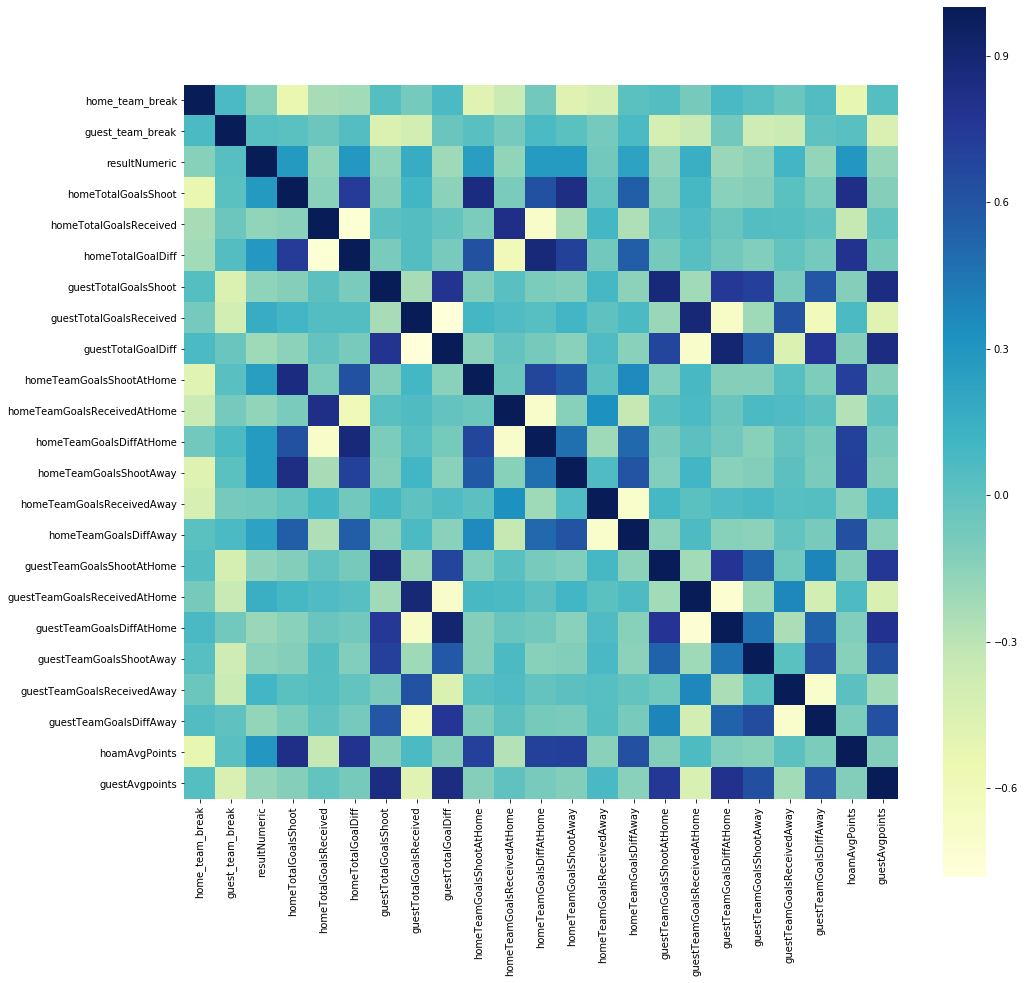

In [268]:
plt.figure(figsize=(16, 16))
sns.heatmap(df_final.corr(), square=True, cmap="YlGnBu")
plt.show()

In [269]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5158 entries, 0 to 5157
Data columns (total 36 columns):
weekday                         5158 non-null object
day                             5158 non-null object
month                           5158 non-null object
year                            5158 non-null object
home_team_break                 5158 non-null int64
guest_team_break                5158 non-null int64
date                            5158 non-null datetime64[ns]
time                            5158 non-null object
home_team_name                  5158 non-null object
guest_team_name                 5158 non-null object
competition                     5158 non-null object
saison                          5158 non-null object
gameday                         5158 non-null object
home_coach                      5158 non-null object
guest_coach                     5158 non-null object
resultNumeric                   5152 non-null float64
homeTotalGoalsShoot             5158 n

In [270]:
df_final.home_team_break.describe()

count     5158.000000
mean      1711.437767
std       8143.357901
min          0.000000
25%          4.000000
50%          7.000000
75%          9.000000
max      43687.000000
Name: home_team_break, dtype: float64

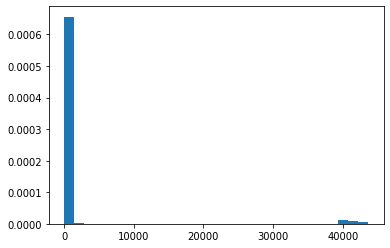

In [271]:
plt.hist(df_final.home_team_break, bins=30, density=True)
plt.show()

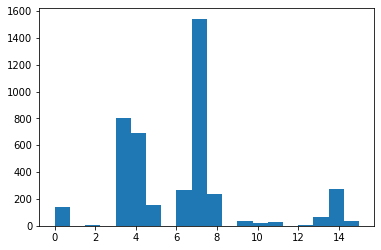

In [272]:
plt.hist(df_final.home_team_break[df_final.home_team_break < 16], bins=20)
plt.show()

In [273]:
df_final.home_team_break[df_final.home_team_break <= 15].groupby(df_final.home_team_break).count()

home_team_break
0      137
2        7
3      800
4      693
5      157
6      265
7     1542
8      239
9       37
10      22
11      32
12       3
13      63
14     273
15      36
Name: home_team_break, dtype: int64

In [274]:
df_final.home_team_break[df_final.home_team_break >= 16] = 'higher15'

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [275]:
pd.get_dummies(df_final.home_team_break).head()

,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,higher15
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [276]:
df_home_team_break = pd.get_dummies(df_final.home_team_break)

In [277]:
df_home_team_break.columns = [
     'htb_0',
     'htb_2',
     'htb_3',
     'htb_4',
     'htb_5',
     'htb_6',
     'htb_7',
     'htb_8',
     'htb_9',
     'htb_10',
     'htb_11',
     'htb_12',
     'htb_13',
     'htb_14',
     'htb_15',
     'htb_>15']


In [278]:
df_final.guest_team_break[df_final.guest_team_break >= 16] = 'higher15'

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [279]:
df_guest_team_break = pd.get_dummies(df_final.guest_team_break)

In [280]:
df_guest_team_break.columns = [
     'gtb_0',
     'gtb_2',
     'gtb_3',
     'gtb_4',
     'gtb_5',
     'gtb_6',
     'gtb_7',
     'gtb_8',
     'gtb_9',
     'gtb_10',
     'gtb_11',
     'gtb_12',
     'gtb_13',
     'gtb_14',
     'gtb_15',
     'gtb_>15']


In [281]:
df_final = pd.concat(
    [df_final,
     pd.get_dummies(df_home_team_break),
     pd.get_dummies(df_guest_team_break)
    ], axis=1)

In [282]:
df_final.isna().sum().sum()

6

In [283]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5158 entries, 0 to 5157
Data columns (total 68 columns):
weekday                         5158 non-null object
day                             5158 non-null object
month                           5158 non-null object
year                            5158 non-null object
home_team_break                 5158 non-null object
guest_team_break                5158 non-null object
date                            5158 non-null datetime64[ns]
time                            5158 non-null object
home_team_name                  5158 non-null object
guest_team_name                 5158 non-null object
competition                     5158 non-null object
saison                          5158 non-null object
gameday                         5158 non-null object
home_coach                      5158 non-null object
guest_coach                     5158 non-null object
resultNumeric                   5152 non-null float64
homeTotalGoalsShoot             5158

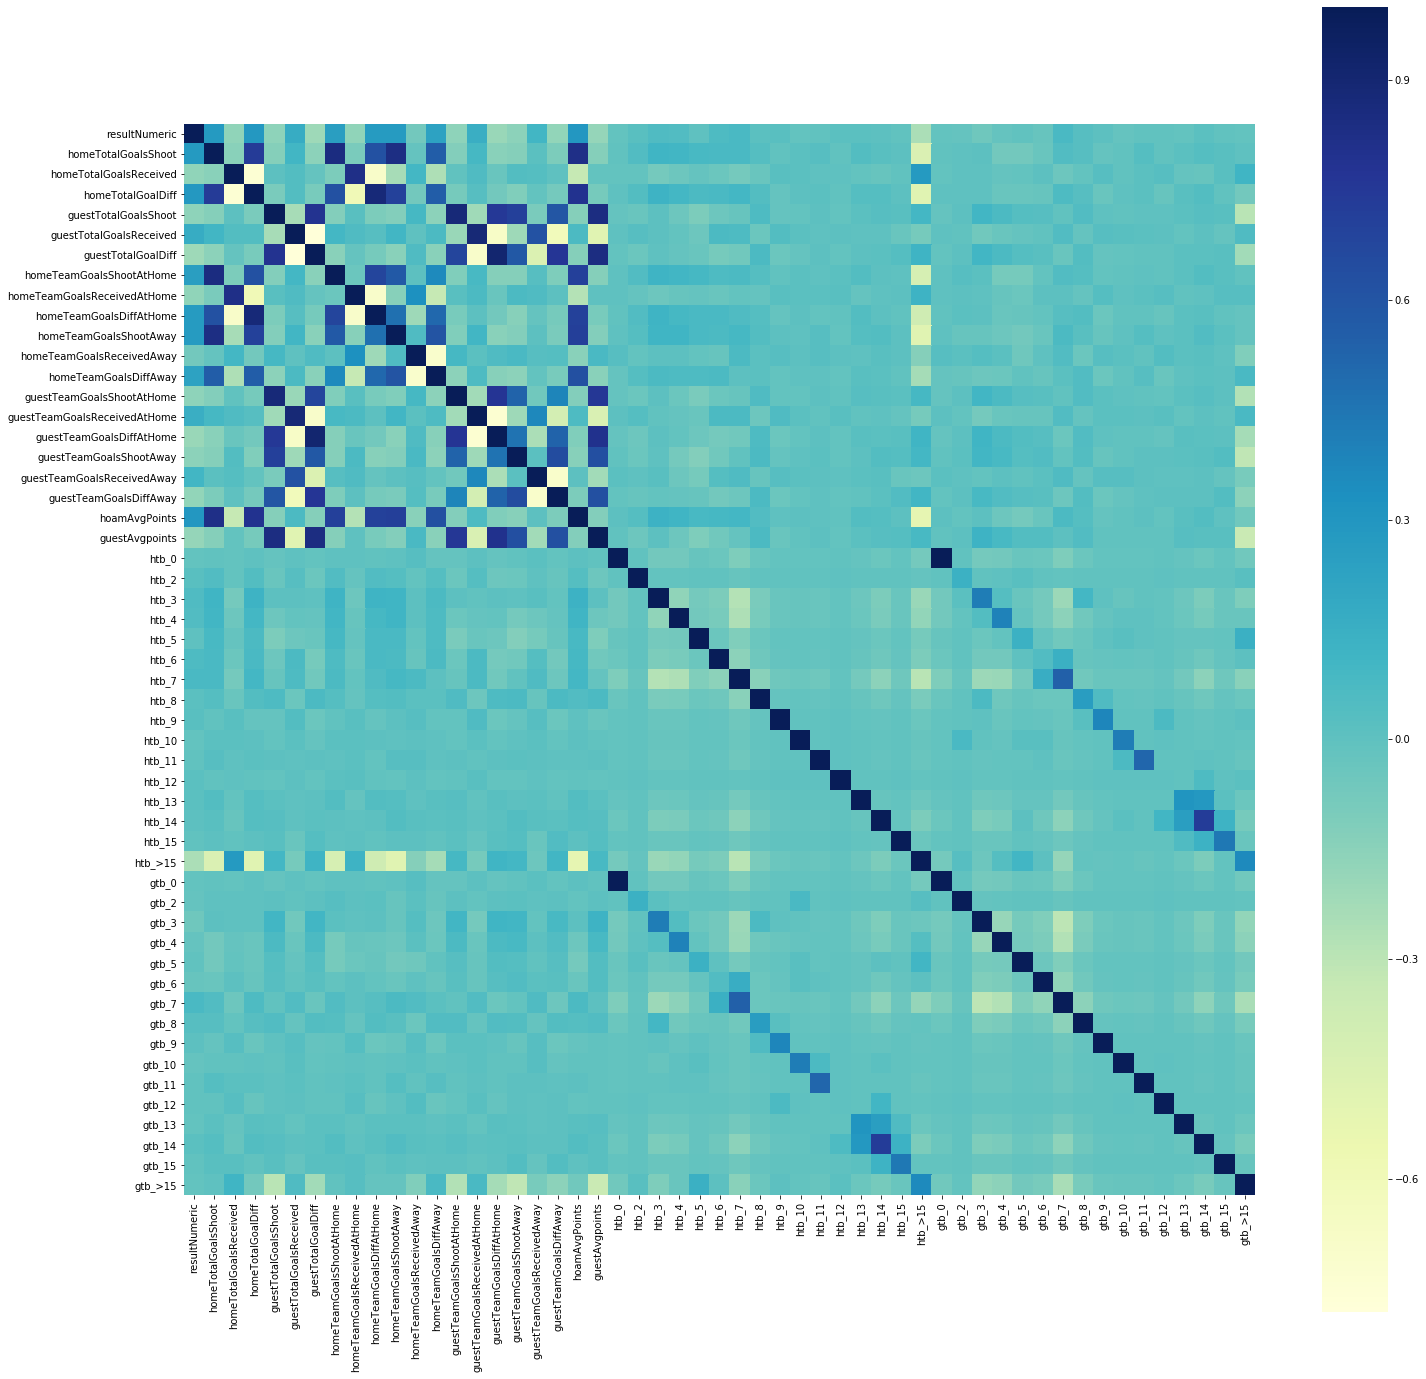

In [284]:
plt.figure(figsize=(24, 24))
sns.heatmap(df_final.corr(), square=True, cmap="YlGnBu")
plt.show()

In [285]:
df_final.tail()

,weekday,day,month,year,home_team_break,guest_team_break,date,time,home_team_name,guest_team_name,...,gtb_7,gtb_8,gtb_9,gtb_10,gtb_11,gtb_12,gtb_13,gtb_14,gtb_15,gtb_>15
5153,5,17,8,2019,7,6,2019-08-17,17:00,Wolfsberger AC,SV Mattersburg,...,0,0,0,0,0,0,0,0,0,0
5154,5,17,8,2019,6,7,2019-08-17,17:00,SKN St. Pölten,Red Bull Salzburg,...,1,0,0,0,0,0,0,0,0,0
5155,6,18,8,2019,8,7,2019-08-18,17:00,SC Rheindorf Altach,TSV Hartberg,...,1,0,0,0,0,0,0,0,0,0
5156,6,18,8,2019,7,8,2019-08-18,17:00,SK Sturm Graz,SK Rapid Wien,...,0,1,0,0,0,0,0,0,0,0
5157,6,18,8,2019,3,8,2019-08-18,17:00,FK Austria Wien,FC Admira Wacker Mödling,...,0,1,0,0,0,0,0,0,0,0


In [286]:
df_final.to_csv('df_final.csv')